<a href="https://colab.research.google.com/github/Dtyagi12/Chennai/blob/main/Chennai_House_Price_Predicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle

In [2]:
df= pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**DATA CLEANING**

---



***1. PRT_ID Column***

In [5]:
# We don't need this column neither in EDA nor in Modelling
# So drop it

data=df.drop(["PRT_ID"], axis=1)
data

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


***2. AREA Column***

In [6]:
# Checking Null Values
data.AREA.isna().sum()

0

In [7]:
# Unique Values in the column
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [8]:
# Correction in spelling using replace function

data["AREA"] = data["AREA"].replace({"Karapakam": "Karapakkam", "TNagar": "T Nagar", "Chrompt": "Chrompet", "Chrmpet": "Chrompet", "Ana Nagar": "Anna Nagar", "Chormpet": "Chrompet", "Adyr": "Adyar", "Velchery": "Velachery", "Ann Nagar": "Anna Nagar", "KKNagar": "KK Nagar"})

In [9]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

***3. DATE_SALE Column***

In [10]:
# Checking Null/NA values
data.DATE_SALE.isna().sum()

0

In [11]:
# Changing DATA TYPE to Datetime
data["DATE_SALE"] = pd.to_datetime(data["DATE_SALE"])

In [12]:
data["DATE_SALE"][0]

Timestamp('2011-04-05 00:00:00')

***4. N_BEDROOM Column***

In [13]:
# Check DATA TYPE
data.N_BEDROOM.dtype

dtype('float64')

In [14]:
data.N_BEDROOM.isna().sum() # There is one value with null/NA

1

In [15]:
# Either we drop it or Fill some value using mode.
# Here we go with filling with mode
data["N_BEDROOM"].fillna(data["N_BEDROOM"].mode()[0], inplace=True)

In [16]:
# Changing DATA TYPE to 'int'
data["N_BEDROOM"]=data["N_BEDROOM"].astype("int")

***5. N_BATHROOM Column***

In [17]:
# Check DATA TYPE of column
data.N_BATHROOM.dtype

dtype('float64')

In [18]:
# Check NULL/NA values
data["N_BATHROOM"].isna().sum()

5

In [19]:
# Here we go with filling with mode
data["N_BATHROOM"].fillna(data["N_BATHROOM"].mode()[0], inplace=True)

In [20]:
# Changing DATA TYPE to 'int'
data["N_BATHROOM"]=data["N_BATHROOM"].astype("int")

***6. SALE_COND Column***

In [21]:
# All unique values in column
data["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [22]:
data["SALE_COND"] = data["SALE_COND"].replace({"Ab Normal": "AbNormal", "Partiall": "Partial", "Adj Land": "AdjLand", "PartiaLl": "Partial"})
data["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

***7. PARK_FACIL Column***

In [23]:
# All unique values in column
data["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [24]:
# Label Encoding (Binary Categorical Feature)
data["PARK_FACIL"] = data["PARK_FACIL"].replace({"Noo": 0, "No": 0, "Yes": 1})

In [25]:
data["PARK_FACIL"].unique()

array([1, 0])

***8. DATE_BUILD Column***

In [26]:
data["DATE_BUILD"].dtype

dtype('O')

In [27]:
# Changing DATA TYPE to Datetime
data["DATE_BUILD"] = pd.to_datetime(data["DATE_BUILD"])

In [28]:
data["DATE_BUILD"][0]

Timestamp('1967-05-15 00:00:00')

***9. BUILDTYPE Column***

In [29]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [30]:
data["BUILDTYPE"] = data["BUILDTYPE"].replace({"Comercial": "Commercial", "Other": "Others"})

In [31]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

***10. UTILITY_AVAIL Column***

In [32]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [33]:
data["UTILITY_AVAIL"] = data["UTILITY_AVAIL"].replace({"All Pub": "AllPub", "NoSewr " : "NoSewr"})

In [34]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

***11. STREET Column***

In [35]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [36]:
data["STREET"] = data["STREET"].replace({"Pavd": "Paved", "NoAccess": "No Access"})

In [37]:
data["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

***12. MZZONE Column***

In [38]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

***13. QS_ROOMS Column***

In [39]:
data.QS_ROOMS.unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [40]:
data.QS_ROOMS.dtype

dtype('float64')

***14. QS_OVERALL Column***

In [41]:
# Checking NA/NULL Values
data["QS_OVERALL"].isna().sum()

48

In [42]:
# Fill NA with 'mean()'
data["QS_OVERALL"].fillna(data["QS_OVERALL"].mean(), inplace=True)

***15. REG_FEE & COMMIS Column***

We need only SALE_PRICE for EDA and Modelling. So we drop REG_FEE & COMMIS both the columns.

In [43]:
data1 = data.drop(["REG_FEE", "COMMIS"], axis=1)

In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   int64         
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

***FEATURE ENGINEERING***

From DATE_SALE & DATE_BUILD create a new column named AGE_OF_BUILDING.
It helps in 

In [45]:
data1["AGE_OF_BUILDING"] = data1["DATE_SALE"].dt.year - data1["DATE_BUILD"].dt.year
data1["AGE_OF_BUILDING"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE_OF_BUILDING, Length: 7109, dtype: int64

Now we don't need DATE_SALE and DATE_BUILD columns. So we drop them.

In [46]:
data1=data1.drop(["DATE_SALE", "DATE_BUILD"], axis=1)

In [47]:
data1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE_OF_BUILDING'],
      dtype='object')

***OUTLIER Detection***

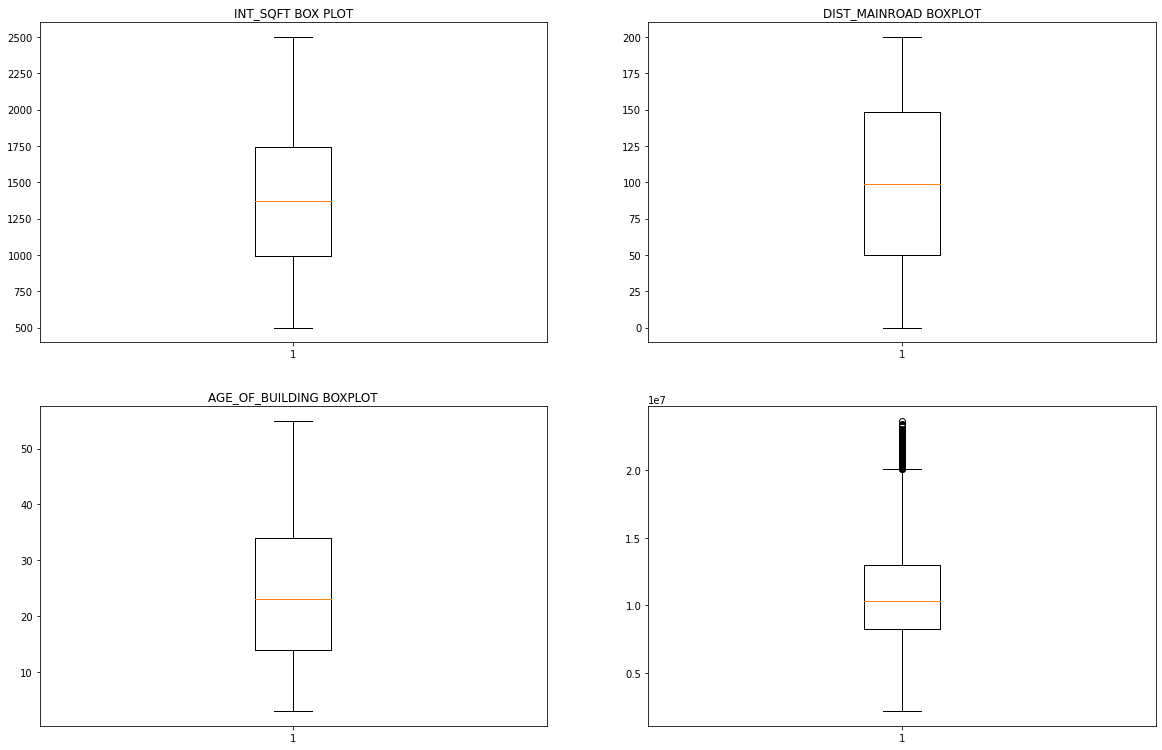

In [48]:
plt.figure(figsize=(20,20))
plt.subplot(321)
plt.boxplot(data1["INT_SQFT"])
plt.title("INT_SQFT BOX PLOT")

plt.subplot(322)
plt.boxplot(data1["DIST_MAINROAD"])
plt.title("DIST_MAINROAD BOXPLOT")

plt.subplot(323)
plt.boxplot(data1["AGE_OF_BUILDING"])
plt.title("AGE_OF_BUILDING BOXPLOT")

plt.subplot(324)
plt.boxplot(data1["SALES_PRICE"])
plt.show()

In [49]:
Q1 = data1.SALES_PRICE.quantile(0.25)
Q2 = data1.SALES_PRICE.quantile(0.75)
iqr = Q2 - Q1
low = Q1-(1.5*iqr)
high = Q2 + (1.5*iqr)
print("LOWER : ",low)
print("UPPER :",high)

LOWER :  1189400.0
UPPER : 20076600.0


In [50]:
dfs = data1.loc[data1["SALES_PRICE"]> high]
dfs

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_BUILDING
1,Anna Nagar,1986,26,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
19,Anna Nagar,1902,168,2,1,5,Family,1,Commercial,ELO,Paved,RL,4.5,4.9,4.9,4.760,21203240,42
47,Anna Nagar,1710,15,1,1,4,Normal Sale,1,Commercial,AllPub,Gravel,RH,2.7,4.0,2.2,2.825,20215970,11
125,T Nagar,1973,63,2,1,5,Family,1,Commercial,AllPub,Gravel,RM,2.6,2.9,4.9,3.710,23307000,35
168,T Nagar,1926,193,2,1,5,AdjLand,1,Commercial,NoSewr,No Access,RM,4.2,4.9,3.1,3.880,22630540,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,T Nagar,1901,83,2,1,5,Normal Sale,1,Commercial,ELO,Paved,RM,4.9,2.2,2.6,3.190,22629400,4
7008,T Nagar,1810,109,2,1,5,AdjLand,1,Commercial,NoSewr,No Access,RM,2.6,2.2,2.5,2.455,21556330,14
7024,Anna Nagar,1703,164,1,1,4,AdjLand,1,Commercial,AllPub,Paved,RL,2.7,3.6,3.5,3.245,20782250,5
7058,T Nagar,1858,36,2,1,5,Normal Sale,1,Commercial,ELO,No Access,RM,2.0,4.7,4.9,3.980,21185700,35


In [51]:
dfs1 = data1.loc[data1["SALES_PRICE"]< low]
dfs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AREA             0 non-null      object 
 1   INT_SQFT         0 non-null      int64  
 2   DIST_MAINROAD    0 non-null      int64  
 3   N_BEDROOM        0 non-null      int64  
 4   N_BATHROOM       0 non-null      int64  
 5   N_ROOM           0 non-null      int64  
 6   SALE_COND        0 non-null      object 
 7   PARK_FACIL       0 non-null      int64  
 8   BUILDTYPE        0 non-null      object 
 9   UTILITY_AVAIL    0 non-null      object 
 10  STREET           0 non-null      object 
 11  MZZONE           0 non-null      object 
 12  QS_ROOMS         0 non-null      float64
 13  QS_BATHROOM      0 non-null      float64
 14  QS_BEDROOM       0 non-null      float64
 15  QS_OVERALL       0 non-null      float64
 16  SALES_PRICE      0 non-null      int64  
 17  AGE_OF_BUILDING  0 non-null 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


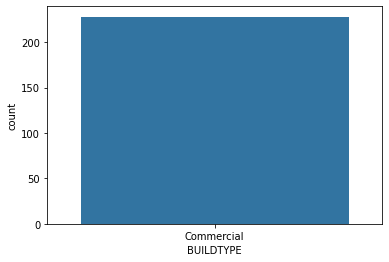

In [52]:
sns.countplot(dfs["BUILDTYPE"])

**Observations:-**

1. As from the boxplot and above data there is no outlier in INT_SQFT, DIST_MAINROAD, AGE_OF_BUILDING.
2. There is outliers in SALES_PRICE.
3. All the outliers belong to same category of BUILDTYPE i.e. COMMERCIAL. So we can say that these are ***valid outliers*** because in general, commercial land in India always slightly higher in price than HOUSE and OTHERS.

**EDA**

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


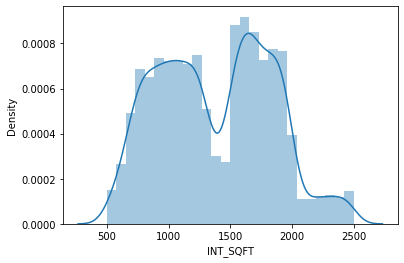

In [53]:
sns.distplot(data1.INT_SQFT)

**Observations:-**

1. The plot of INT_SQFT not follow normal distribution.
2. Even there is no skew in this plot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


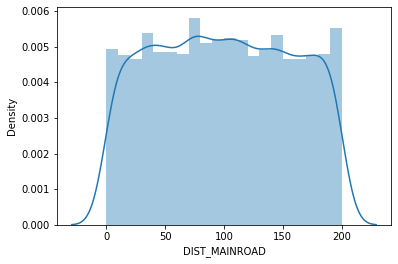

In [54]:
sns.distplot(data1.DIST_MAINROAD)

Observation:-

1. All distance having same density in DIST_MAINROAD plot.
2. There is no such change in graph, its uniformly distributed graph.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


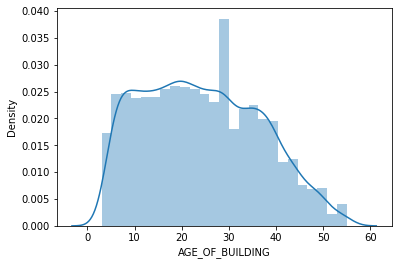

In [55]:
sns.distplot(data1.AGE_OF_BUILDING)

In [56]:
value=data1["SALE_COND"].value_counts()
name=data1["SALE_COND"].unique()
fig=px.pie(data1,values=value,names=name,color=value,title="<b>Distribution of condition of sale")
fig

**Observation:-**

1. All condition sale is approximately equal.
2. There is uniform distribution for all SALE_COND.

***FEATURE vs FEATURE***

In [57]:
data_area = data1.groupby('AREA')['AGE_OF_BUILDING'].mean()
data_area

AREA
Adyar         22.657623
Anna Nagar    25.342640
Chrompet      22.079318
KK Nagar      17.320963
Karapakkam    27.718155
T Nagar       25.225549
Velachery     30.299694
Name: AGE_OF_BUILDING, dtype: float64

Text(0.5, 1.0, 'AREA vs AGE_OF_BUILDING')

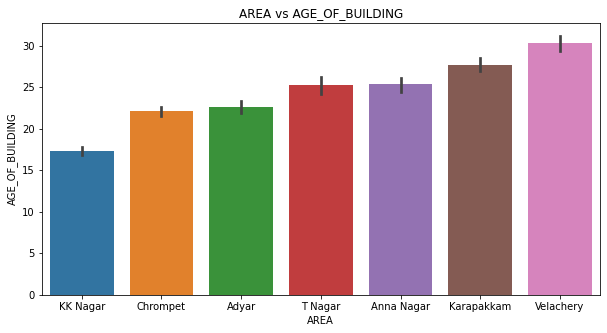

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x=data1.AREA,y=data1.AGE_OF_BUILDING,order=data1.groupby('AREA')['AGE_OF_BUILDING'].mean().reset_index().sort_values('AGE_OF_BUILDING')['AREA'])
plt.title('AREA vs AGE_OF_BUILDING')

**Observations:-**


In the above data top 3 Areas have more aged buildings are
1. Velachery
2. Karapakkam
3. Anna Nagar

Maybe these are the old part of city.


In [59]:
data_area_sqft = data1.groupby('AREA')['INT_SQFT'].mean().reset_index().sort_values("INT_SQFT")
values=data1["AREA"].unique()
data_area_sqft

,AREA,INT_SQFT
0,Adyar,958.166667
2,Chrompet,1003.254994
4,Karapakkam,1103.406296
6,Velachery,1741.293578
1,Anna Nagar,1752.998731
5,T Nagar,1759.576846
3,KK Nagar,1903.332999


In [60]:
fig2=px.bar(data_area_sqft, x=values, y="INT_SQFT", color=values)
fig2

**Observation:-**

1. T Nagar, KK Nagar, Chrompet have large size of buildings averagely.
2. Maybe these areas are the rich people areas.

In [61]:
px.histogram(data1, x="BUILDTYPE", color="AREA", barmode='group')

**Observation:-**

1. Chrompet have all types of buildings sale higher than other and House sale is higher than other two types within Chrompet.
2. Karapakkam area is 2nd in demand than others but house sale is also higher in Karapakkam.
3. T Nagar is least in demand and within T Nagar commercial building sale is high than other two.
4. There are approximately same percentage of all three types of building in each area respectively.

In [62]:
px.histogram(data1, x="PARK_FACIL", color="AREA", barmode='group')

**Observations:-**

Park facility have no impact on sale. Yes and No both are approximately equal in demand in every area.

In [63]:
px.histogram(data1, x="N_ROOM", color="AREA", barmode='group')

**Observations:-**

1. On the basis of number of rooms, Chrompet area 3 room building have highest sale whereas KK Nagar 3 room building have least sale.
2. Maybe only KK Nagar have 6 room building.

In [64]:
X=data1.UTILITY_AVAIL.value_counts().sort_values()
val=data1["UTILITY_AVAIL"].unique()
px.bar(X, x=val, y=X, color=val, labels={"x" : "UTILITY_AVAIL", "y" : "VALUE_COUNTS"})

In [65]:
px.histogram(data1, x="UTILITY_AVAIL", color="AREA", barmode='group')

**Observation:-**

1. Sale of AllPub utility is minimum whereas NoSeWa is higher.
2. Chrompet have higher sales compare to other in all utilities.
3. KK Nagar have no sale in ELO utility. Maybe KK Nagar have no ELO utility.

In [66]:
px.histogram(data1, x="UTILITY_AVAIL", color="N_ROOM", barmode='group')

**Observation:-**

1. KK Nagar have not any sale of ELO ultility building.
2. NoSewr utility have the highest sale in all 3 utilities.
3. 6 room building have no utility of ELO.

***FEATURES vs TARGET***

In [67]:
target = data1["SALES_PRICE"]

Continous Data Features

Text(0.5, 1.0, 'AGE_OF_BUILDING vs SALES_PRICE')

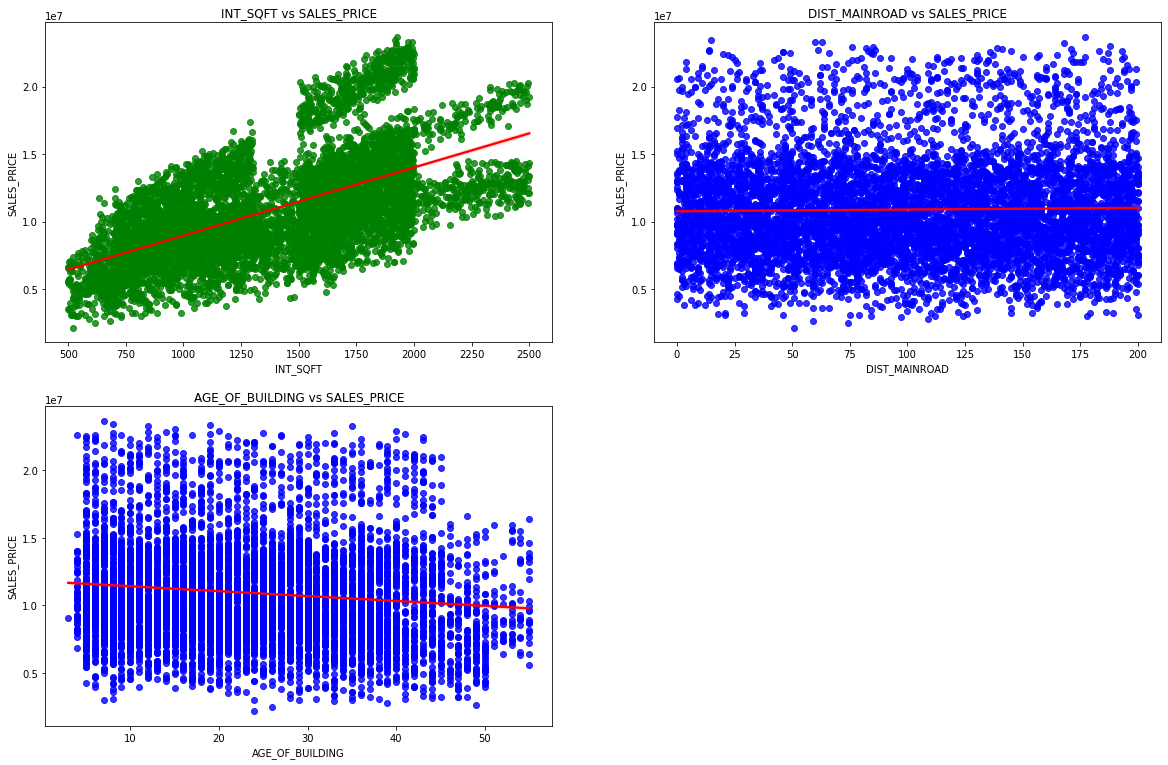

In [68]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x = data1["INT_SQFT"], y = target, scatter_kws={"color" : "green"}, line_kws={"color":"red"})
plt.title("INT_SQFT vs SALES_PRICE")

plt.subplot(322)
sns.regplot(x = data1["DIST_MAINROAD"], y = target, scatter_kws={"color" : "blue"}, line_kws={"color":"red"})
plt.title("DIST_MAINROAD vs SALES_PRICE")

plt.subplot(323)
sns.regplot(x = data1["AGE_OF_BUILDING"], y = target, scatter_kws={"color" : "blue"}, line_kws={"color":"red"})
plt.title("AGE_OF_BUILDING vs SALES_PRICE")

Observations:-

1. TOTAL_SALE_PRICE increase with increasing INT_SQFT.
2. Distance from mainroad have no impact on TOTAL_SALE_PRICE.
3. AGE_OF_BUILDING have minimal impact on TOTAL_SALE_PRICE.

Text(0.5, 1.0, 'QS_OVERALL vs SALES_PRICE')

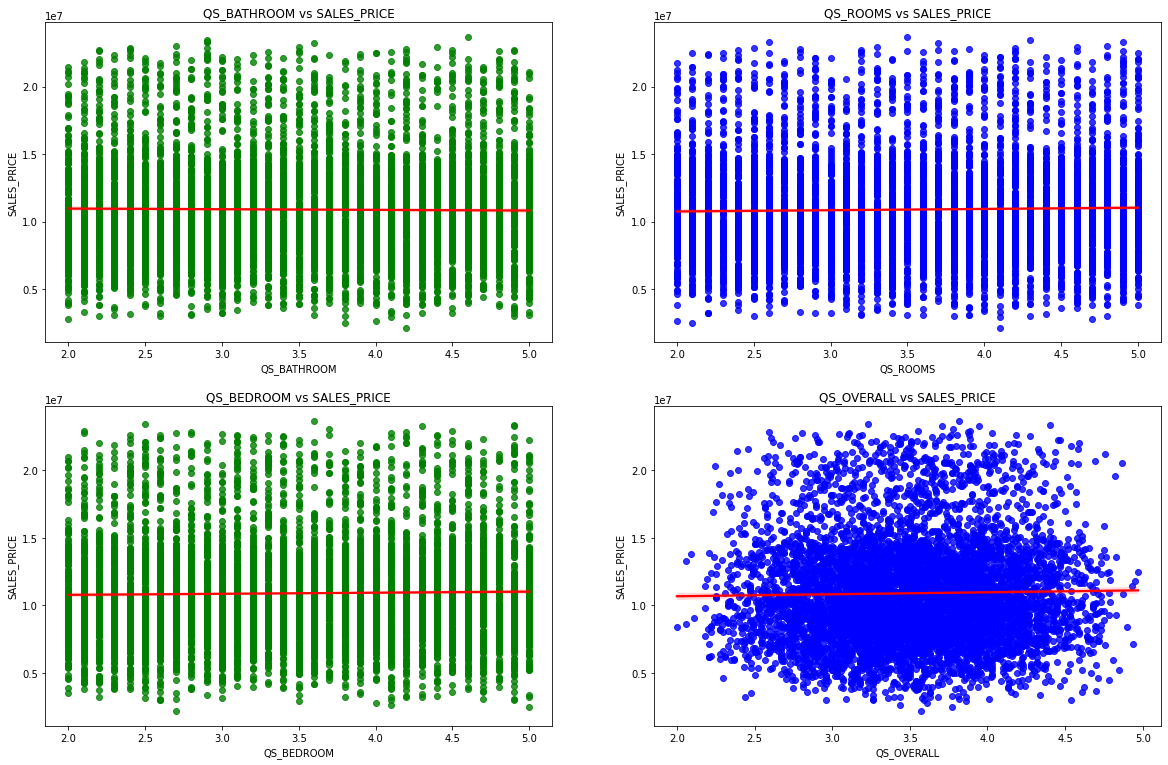

In [69]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x = data1["QS_BATHROOM"], y = target, scatter_kws={"color" : "green"}, line_kws={"color":"red"})
plt.title("QS_BATHROOM vs SALES_PRICE")

plt.subplot(322)
sns.regplot(x = data1["QS_ROOMS"], y = target, scatter_kws={"color" : "blue"}, line_kws={"color":"red"})
plt.title("QS_ROOMS vs SALES_PRICE")

plt.subplot(323)
sns.regplot(x = data1["QS_BEDROOM"], y = target, scatter_kws={"color" : "green"}, line_kws={"color":"red"})
plt.title("QS_BEDROOM vs SALES_PRICE")

plt.subplot(324)
sns.regplot(x = data1["QS_OVERALL"], y = target, scatter_kws={"color" : "blue"}, line_kws={"color":"red"})
plt.title("QS_OVERALL vs SALES_PRICE")

**Observation:-**

1. QS_ROOM, QS_BEDROOM, QS_BATHROOM, QS_OVERALL have no any effect on TOTAL_SALE_PRICE (as seen in above graphs).
2. So for modelling purpose we don't use these columns.

Text(0.5, 1.0, 'N_ROOM vs SALES_PRICE')

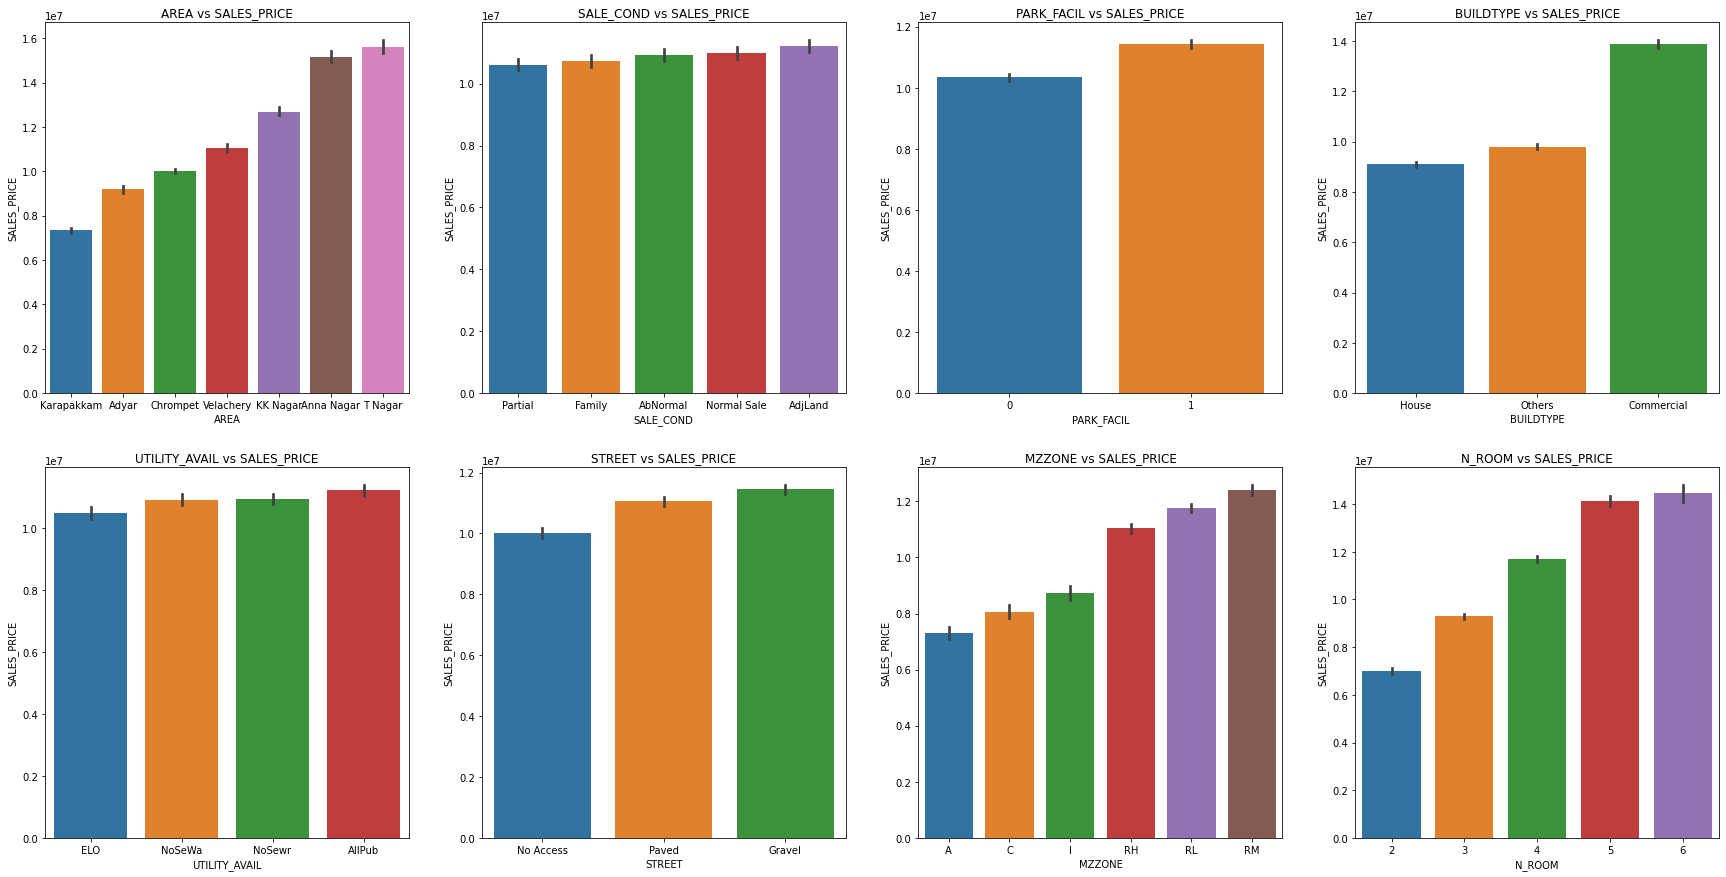

In [70]:
plt.figure(figsize=(30,15))
plt.subplot(241)
sns.barplot(x=data1.AREA,y=data1.SALES_PRICE,order=data1.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

plt.subplot(242)
sns.barplot(x=data1.SALE_COND,y=data1.SALES_PRICE,order=data1.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

plt.subplot(243)
sns.barplot(x=data1.PARK_FACIL,y=data1.SALES_PRICE,order=data1.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

plt.subplot(244)
sns.barplot(x=data1.BUILDTYPE,y=data1.SALES_PRICE, order=data1.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

plt.subplot(245)
sns.barplot(x=data1.UTILITY_AVAIL,y=data1.SALES_PRICE,order=data1.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')

plt.subplot(246)
sns.barplot(x=data1.STREET,y=data1.SALES_PRICE,order=data1.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')

plt.subplot(247)
sns.barplot(x=data1.MZZONE,y=data1.SALES_PRICE,order=data1.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

plt.subplot(248)
sns.barplot(x=data1.N_ROOM,y=data1.SALES_PRICE,order=data1.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

**Observations:-**

1. T Nagar least in demand but having high average TOTAL_SALE_PRICE.
2. T Nagar also have more sales of commercial buildings.
3. Commercial BUILDTYPE also have outlier and high average TOTAL_SALE_PRICE.
4. BUILDTYPE impact the TOTAL_SALE_PRICE.

Text(0.5, 1.0, 'N_BEDROOM vs SALES_PRICE')

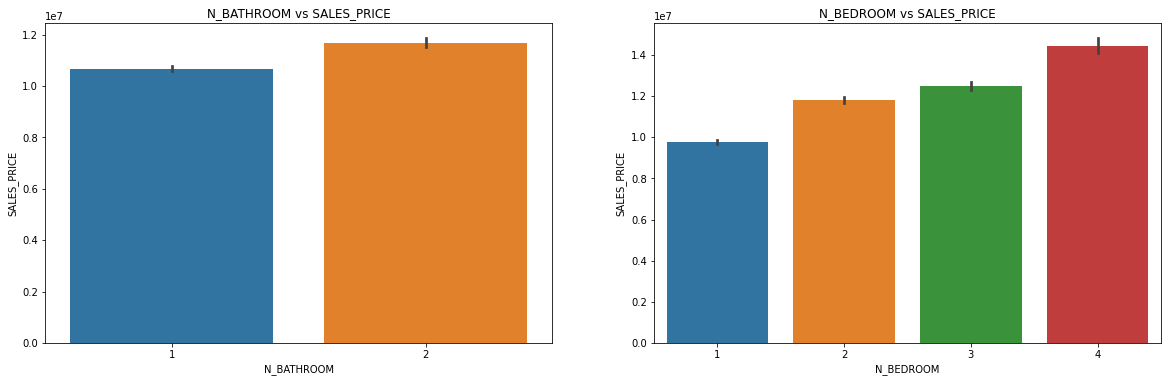

In [71]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.barplot(x=data1.N_BATHROOM,y=data1.SALES_PRICE,order=data1.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('N_BATHROOM vs SALES_PRICE')

plt.subplot(322)
sns.barplot(x=data1.N_BEDROOM,y=data1.SALES_PRICE,order=data1.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('N_BEDROOM vs SALES_PRICE')

**Observations:-**

1. Area, MZ Zone, N_ROOM, N_BEDROOM, N_BATHROOM, STREET & SALE_COND have linear relationship with TOTAL_SALE_PRICE.
2. We use ordinal label encoding for AREA, STREET, MZ ZONE & SALE_COND. 
3. BUILDTYPE have not linear relationship but effect SALE_PRICE. So, we go with one hot encoding for this column.
4. UTILITY_AVAIL, STREET have linear relationship with TOTAL_SALE_PRICE. But having less impact compare to other features.

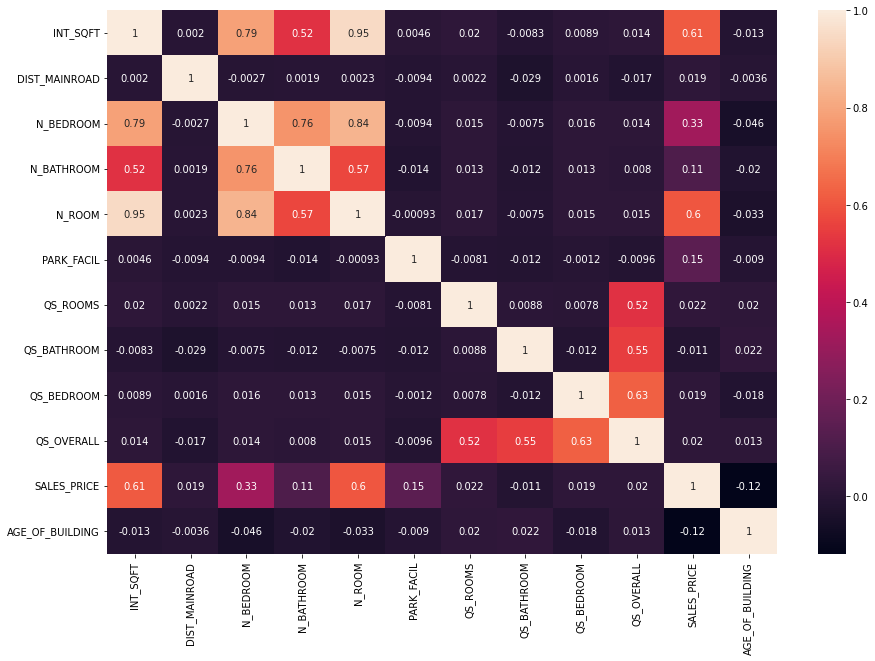

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(), annot=True)
plt.show()

**Observations:-**

1. Even Correlation heatmap graph also shows linar relationship between INT_SQFT, N_ROOM, N_BEDROOM



**ENCODING**

---



***1. ONE-HOT Encoding***

In [73]:
dataX = pd.get_dummies(data1, columns=["BUILDTYPE"])

In [74]:
dataX

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_BUILDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,Karapakkam,1004,131,1,1,3,AbNormal,1,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,Anna Nagar,1986,26,2,1,5,AbNormal,0,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,Adyar,909,70,1,1,3,AbNormal,1,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,Velachery,1855,14,3,2,5,Family,0,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,Karapakkam,1226,84,1,1,3,AbNormal,1,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,0,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49,0,0,1
7105,Velachery,1897,52,3,2,5,Family,1,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,9,0,0,1
7106,Velachery,1614,152,2,1,4,Normal Sale,0,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,28,0,1,0
7107,Karapakkam,787,40,1,1,2,Partial,1,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,32,1,0,0


***2. Dropping Not-Required Columns***

In [75]:
data2 = dataX.drop(["QS_BEDROOM", "QS_BATHROOM", "QS_ROOMS", "QS_OVERALL"], axis = 1)

In [76]:
data2

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,Karapakkam,1004,131,1,1,3,AbNormal,1,AllPub,Paved,A,7600000,44,1,0,0
1,Anna Nagar,1986,26,2,1,5,AbNormal,0,AllPub,Gravel,RH,21717770,11,1,0,0
2,Adyar,909,70,1,1,3,AbNormal,1,ELO,Gravel,RL,13159200,20,1,0,0
3,Velachery,1855,14,3,2,5,Family,0,NoSewr,Paved,I,9630290,22,0,0,1
4,Karapakkam,1226,84,1,1,3,AbNormal,1,AllPub,Gravel,C,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,0,ELO,No Access,RM,5353000,49,0,0,1
7105,Velachery,1897,52,3,2,5,Family,1,NoSeWa,No Access,RH,10818480,9,0,0,1
7106,Velachery,1614,152,2,1,4,Normal Sale,0,NoSeWa,Gravel,I,8351410,28,0,1,0
7107,Karapakkam,787,40,1,1,2,Partial,1,ELO,Paved,RL,8507000,32,1,0,0


***3. Ordinal LABEL Encoding***

In [77]:
# Ordinal LABEL encoding

data2["AREA"] = data2["AREA"].map({"Karapakkam": 0,"Adyar": 1, "T Nagar": 6, "Chrompet": 2, "Velachery": 3, "Anna Nagar" : 5,"KK Nagar" : 4})

data2["SALE_COND"] = data2["SALE_COND"].map({"Partial": 0,"Family": 1,"AbNormal": 2, "Normal Sale": 3,"AdjLand" : 4})

data2["UTILITY_AVAIL"] = data2["UTILITY_AVAIL"].map({"ELO": 0, "NoSeWa": 1, "NoSewr" : 2, "AllPub": 3})

data2["STREET"] = data2["STREET"].map({"No Access": 0,"Paved": 1, "Gravel": 2})

data2["MZZONE"] = data2["MZZONE"].map({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})

In [78]:
data2.to_csv("ML.csv")

**Now our DATA is completely ready for Machine Learning model development purpose.**

---

**Machine Learning Models:-**

---



In [79]:
data2.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALES_PRICE', 'AGE_OF_BUILDING', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [80]:
#setting features and target

x=data2[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_OF_BUILDING', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others']].values
y=data2["SALES_PRICE"].values

***1. LINEAR REGRESSION Model***

In [81]:
#splitting train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [82]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [83]:
#Build model

from sklearn.linear_model import LinearRegression
model_lin=LinearRegression()
model_lin.fit(x_train,y_train)

LinearRegression()

In [84]:
# given the features of the test dataset, it will give the final predictions

y_pred_lin = model_lin.predict(x_test)
y_pred_lin

array([16126450.02799199, 18544701.29401451, 13631659.55001348, ...,
        7151982.29924038, 14411614.00964455,  8623468.46151684])

In [85]:
Data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})
Data

,Actual,Predicted
0,15664740,1.612645e+07
1,19286610,1.854470e+07
2,13308490,1.363166e+07
3,12496560,1.272196e+07
4,9082000,9.219925e+06
...,...,...
1417,13104880,1.304517e+07
1418,14083210,1.399919e+07
1419,6835375,7.151982e+06
1420,14154820,1.441161e+07


In [86]:
# Calculating R2 value to evaluate model

from sklearn import metrics
X_lin = metrics.r2_score(y_test,y_pred_lin)
print('R2- SCORE:', round((X_lin*100),2),"%")

R2- SCORE: 92.45 %


***2. KNN Model***

In [87]:
# splitting test and train data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=10)

In [88]:
# Scaling of test and train data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train, y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [89]:
# fit the model

from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor()
model_KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [90]:
y_pred_KNN = model_KNN.predict(x_test)
y_pred_KNN

array([ 9552360., 10945668., 12372866., ..., 10716068., 18593568.,
        8137484.])

In [91]:
# Actual and Predicted values

Data_KNN= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNN})
Data_KNN

,Actual,Predicted
0,15664740,9552360.0
1,19286610,10945668.0
2,13308490,12372866.0
3,12496560,14545376.0
4,9082000,10544060.0
...,...,...
1417,13104880,16155148.0
1418,14083210,9788834.0
1419,6835375,10716068.0
1420,14154820,18593568.0


In [92]:
from sklearn import metrics
X_KNN = metrics.r2_score(y_test,y_pred_KNN)
print('R2- SCORE:', round((X_KNN*100),2),"%")

R2- SCORE: 31.42 %


***3. DECISION TREE Model***

In [93]:
# Train test splitting of data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=10)

In [94]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [95]:
# Trying to get appropriate depth of data

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train, y_train) # the model is trained
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10, scoring = make_scorer(metrics.r2_score))
  print("DEPTH: ",depth,"R2-Score: ",np.mean(valAccuracy))

DEPTH:  1 R2-Score:  0.347118098239271
DEPTH:  2 R2-Score:  0.6805891807086866
DEPTH:  3 R2-Score:  0.7999825514227237
DEPTH:  4 R2-Score:  0.8790449379744987
DEPTH:  5 R2-Score:  0.911430881128377
DEPTH:  6 R2-Score:  0.9333134267798446
DEPTH:  7 R2-Score:  0.9484475964020808
DEPTH:  8 R2-Score:  0.9577422438444924
DEPTH:  9 R2-Score:  0.9638972891189065
DEPTH:  10 R2-Score:  0.9666313787654077
DEPTH:  20 R2-Score:  0.9679738744060119
DEPTH:  40 R2-Score:  0.9677271477024488
DEPTH:  60 R2-Score:  0.9682738086940951


In [96]:
# fit the model

dt = DecisionTreeRegressor(max_depth=40)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=40)

In [97]:
y_pred_tree = dt.predict(x_test)
y_pred_tree

array([15053510., 19536370., 14244070., ...,  8687220., 17398940.,
       18485760.])

In [98]:
# Actual vs Predicted values

df_tree=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_tree})
df_tree

,Actual,Predicted
0,15664740,15053510.0
1,19286610,19536370.0
2,13308490,14244070.0
3,12496560,12572700.0
4,9082000,7730250.0
...,...,...
1773,14844750,14531570.0
1774,8778570,9089160.0
1775,9586150,8687220.0
1776,18035580,17398940.0


In [99]:
from sklearn import metrics
X_tree = metrics.r2_score(y_test,y_pred_tree)
print('R2- SCORE:', round((X_tree*100),2),"%")

R2- SCORE: 96.89 %


In [100]:
import pickle

pickle.dump(dt, open("ChennaiPrice.sav", "wb"))


In [101]:
feature = pd.Series(dt.feature_importances_, index = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_OF_BUILDING', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others']).sort_values(ascending = False)
feature_score = feature*100
feature_score

AREA                    47.005702
BUILDTYPE_Commercial    33.225616
INT_SQFT                10.389733
MZZONE                   3.847065
PARK_FACIL               1.558648
N_BEDROOM                1.191606
STREET                   1.111980
AGE_OF_BUILDING          0.441295
BUILDTYPE_House          0.352446
DIST_MAINROAD            0.258388
BUILDTYPE_Others         0.223307
SALE_COND                0.215879
UTILITY_AVAIL            0.119554
N_BATHROOM               0.039685
N_ROOM                   0.019095
dtype: float64

***3. RANDOM FOREST Model***

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt')

In [104]:
y_pred_rf = rf.predict(x_test)

In [105]:
Data_rf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
Data_rf

,Actual,Predicted
0,11056500,1.097094e+07
1,9817150,9.563921e+06
2,6951120,8.492081e+06
3,13765430,1.288188e+07
4,10706200,1.034597e+07
...,...,...
1773,20817260,1.688810e+07
1774,20037030,1.689301e+07
1775,7331750,9.124102e+06
1776,13746840,1.126650e+07


In [106]:
from sklearn import metrics
X_rf = metrics.r2_score(y_test,y_pred_rf)
print('R2- SCORE:', round((X_rf*100),2),"%")

R2- SCORE: 82.93 %


In [107]:
feature = pd.Series(rf.feature_importances_, index = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_OF_BUILDING', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others']).sort_values(ascending = False)
feature_score = feature*100
feature_score

AREA                    22.695846
BUILDTYPE_Commercial    21.950335
INT_SQFT                16.971774
N_ROOM                  13.480123
MZZONE                   8.520769
BUILDTYPE_House          6.398103
N_BEDROOM                4.339653
BUILDTYPE_Others         3.361674
AGE_OF_BUILDING          0.583505
PARK_FACIL               0.579169
STREET                   0.527531
N_BATHROOM               0.504301
DIST_MAINROAD            0.039929
UTILITY_AVAIL            0.026548
SALE_COND                0.020740
dtype: float64

***5. XG BOOSTING Model***

In [108]:
x=data2[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_OF_BUILDING', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others']].values
y=data2["SALES_PRICE"].values

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [110]:
x_test

array([[   2,  935,   78, ...,    1,    0,    0],
       [   2, 1233,   24, ...,    0,    1,    0],
       [   1, 1291,    0, ...,    0,    1,    0],
       ...,
       [   0, 1010,  116, ...,    1,    0,    0],
       [   1,  991,  133, ...,    1,    0,    0],
       [   0,  719,  156, ...,    1,    0,    0]])

In [111]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.38489993633857233  Cross-Val score :  -0.3927574040824898
Learning rate :  0.02  Train score :  0.7457308316680722  Cross-Val score :  0.7419326871111264
Learning rate :  0.03  Train score :  0.9244348201618292  Cross-Val score :  0.9216967827276983
Learning rate :  0.04  Train score :  0.9622425816041024  Cross-Val score :  0.9594980737841615
Learning rate :  0.05  Train score :  0.9745922194376174  Cross-Val score :  0.9720099390091141
Learning rate :  0.1  Train score :  0.9916041779365373  Cross-Val score :  0.9902455341009608
Learning rate :  0.11  Train score :  0.9931762589416397  Cross-Val score :  0.9917144056140044
Learning rate :  0.12  Train score :  0.9939939688505877  Cross-Val score :  0.9925191427826394
Learning rate :  0.13  Train score :  0.9948252232452159  Cross-Val score :  0.993103146758207
Learning rate :  0.14  Train score :  0.9952697531610277  Cross-Val score :  0.9936580388218154
Learning rate :  0.15  Train score :  0

In [112]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
model_XG = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model_XG.fit(x_train,y_train) #train the model
model_XG.score(x_test, y_test) # scoring the model - r2 squared

0.9972711382628332

In [114]:
XG_pred= model_XG.predict(x_test)

In [115]:
Data_XG= pd.DataFrame({"Actual": y_test, "Predicted": XG_pred})
Data_XG

,Actual,Predicted
0,11056500,11093178.0
1,9817150,9965132.0
2,6951120,7012352.0
3,13765430,13825912.0
4,10706200,10936486.0
...,...,...
1773,20817260,20380294.0
1774,20037030,20266970.0
1775,7331750,7373965.5
1776,13746840,13508348.0


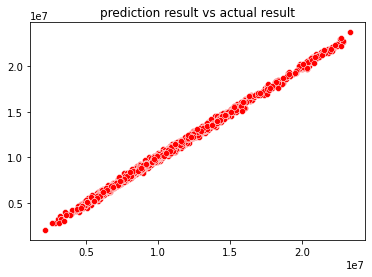

In [116]:
sns.scatterplot(x= y_test, y=XG_pred, color=["red"])
plt.title("prediction result vs actual result")
plt.show()

In [117]:
from sklearn import metrics
X_XG = metrics.r2_score(y_test,XG_pred)
print('R2- SCORE:', round((X_XG*100),2),"%")

R2- SCORE: 99.73 %


In [118]:
feature = pd.Series(model_XG.feature_importances_, index = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_OF_BUILDING', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others']).sort_values(ascending = False)
feature_score = feature*100
feature_score

AREA                    39.271431
BUILDTYPE_Commercial    37.220276
PARK_FACIL               5.997614
MZZONE                   3.625536
INT_SQFT                 3.477070
STREET                   3.311422
BUILDTYPE_House          2.657605
N_BEDROOM                2.198520
SALE_COND                0.704953
N_BATHROOM               0.659386
AGE_OF_BUILDING          0.396162
UTILITY_AVAIL            0.343452
BUILDTYPE_Others         0.082092
N_ROOM                   0.033595
DIST_MAINROAD            0.020890
dtype: float32

In [119]:
print("All Models R2 values are: ")
print("-------------------------------------------")
print("Linear Regression Model: ", round((X_lin*100),2),"%")
print("KNN Model: ", round((X_KNN*100),2),"%")
print("Decision Tree Model: ", round((X_tree*100),2),"%")
print("Random Forest Model: ", round((X_rf*100),2),"%")
print("XG BOOST Model: ", round((X_XG*100),2),"%")

All Models R2 values are: 
-------------------------------------------
Linear Regression Model:  92.45 %
KNN Model:  31.42 %
Decision Tree Model:  96.89 %
Random Forest Model:  82.93 %
XG BOOST Model:  99.73 %
